<body>    
    <div width="1200">
        <img src="img/CTU_logo_banner.png" width="360" align="left"/>
</body>

<h4 style="color: #2A80EE;"><b>NMA</b> Michal Markl</h4>

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
params = {#'font.family' : 'sans-serif',
        #   'font.sans-serif' : 'Ubuntu',
          'text.usetex': False,
          'xtick.direction' : 'in',
          'ytick.direction' : 'in',
          'legend.edgecolor' : 'white',
          'legend.facecolor' : (0.44,0.48,0.52,0.7),
          'legend.labelcolor' : "white",
          'lines.linewidth' : 0.6,
          'lines.markersize' : 3,
          'lines.markerfacecolor' : (1,1,1,0),
          'lines.markeredgewidth' : 0.6,
          'axes.prop_cycle' : cycler(color=['dodgerblue', 'deepskyblue', 'steelblue', 'blue']),
          'axes.edgecolor':'white',
          'xtick.color':'white',
          'ytick.color':'white'
         }
plt.rcParams.update(params)
from lib import stylePlot
from IPython.display import display, Math
import sympy as sp
from scipy.integrate import odeint

In [3]:
A = np.array([
    [2, 1/2],
    [1/2, 2],
])


X0 = np.array([2, -4])

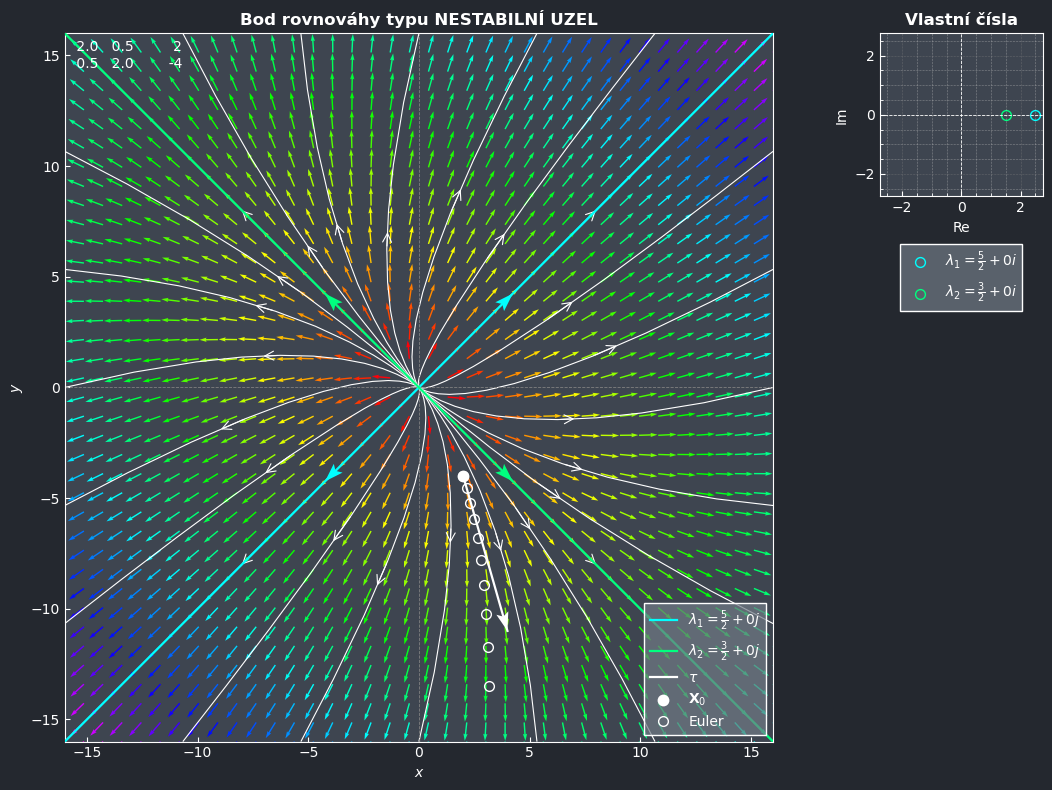

In [4]:
eigVals, eigVecs = np.linalg.eig(A)

from lib import recog_type        
portrait_type = recog_type(eigVals)
eigVecs = eigVecs.transpose()

gs = mpl.gridspec.GridSpec(2, 3, width_ratios=(1, 1, 0.5), height_ratios=(0.4, 1))
fig = plt.figure(figsize=(11, 8))
fig.tight_layout()
ax = fig.add_subplot(gs[0:2, 0:2], autoscale_on=False, xlim=(-16, 16), ylim=(-16, 16))
fig.set_facecolor("#24282f")
ax.set_aspect('equal')

from lib import plot_eigen_vecs
plot_eigen_vecs(eigVals, eigVecs, portrait_type, ax)

X, Y = np.meshgrid(np.linspace(-16, 16, 38), np.linspace(-16, 16, 38))
U = A[0, 0]*X + A[0, 1]*Y
V = A[1, 0]*X + A[1, 1]*Y
N = np.sqrt(U**2 + V**2)
plt.quiver(X, Y, U/N, V/N, N, units='x', width=0.064, scale=1.2, cmap=plt.cm.gist_rainbow, zorder=1) #  np.hypot(U, V), cmap=mpl.cm.gnuplot2, alpha=0.2,
plt.streamplot(X, Y, U, V, color="white", density=0.24, linewidth=0.8, broken_streamlines=False, zorder=2, arrowsize=1.6, arrowstyle='->')

ax.axhline(0, linestyle="dashed", color="gray", lw=0.6)
ax.axvline(0, linestyle="dashed", color="gray", lw=0.6)
ax.set_title(f"Bod rovnováhy typu {portrait_type.upper()}", color="white").set_fontweight('bold');
ax.set_xlabel('$x$', color="white");
ax.set_ylabel('$y$', color="white");

from lib import tangent_vec
tangent_vec(A, X0, ax)

from lib import collatz2t2
h = 0.08
Y = collatz2t2(A, X0, h, 10)
ax.plot(Y[:, 0], Y[:, 1], marker='o', mfc=(0,0,0,0), mec="white", lw=0, mew=1, ms=7, label="Euler")

stylePlot(ax, legloc="lower right", grid=False);
ax.set_facecolor("#3e4550")



ax2 = fig.add_subplot(gs[0, 2])
ax2.axhline(0, linestyle="dashed", color="white", lw=0.6)
ax2.axvline(0, linestyle="dashed", color="white", lw=0.6)
ax2.set_title("Vlastní čísla", color="white").set_fontweight('bold')
ax2.set_xlabel("Re", color="white")
ax2.set_ylabel("Im", color="white")
ax2.set_aspect("equal")

from lib import plot_eigen_vals_positions
plot_eigen_vals_positions(eigVals, ax2)
stylePlot(ax2, legloc="upper center");
leg2 = ax2.get_legend()
leg2.set_ncols(2)
leg2.set_bbox_to_anchor((0.5, -0.25))
from lib import unpack_eig_vals
ax2.set_xlim([-1.1*max(unpack_eig_vals(eigVals)), 1.1*max(unpack_eig_vals(eigVals))]);
ax2.set_ylim([-1.1*max(unpack_eig_vals(eigVals)), 1.1*max(unpack_eig_vals(eigVals))]);
ax2.set_facecolor("#3e4550")

ax.text(.01, .99, f" {A[0][0]}   {A[0][1]}         {X0[0]}\n {A[1][0]}   {A[1][1]}         {X0[1]}".replace(' -', '-'), ha="left", va="top", transform=ax.transAxes, color="white");

fig.tight_layout()
# fig.savefig(f'phase_portrait.png', dpi=400, transparent=False, bbox_inches='tight', format="png")